In [1]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
salary = pd.read_csv('Salary_Data.csv')
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
salary.shape

(30, 2)

In [5]:
salary.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
salary.dtypes

YearsExperience    float64
Salary             float64
dtype: object

### Assumption Check

#### Linearity Test

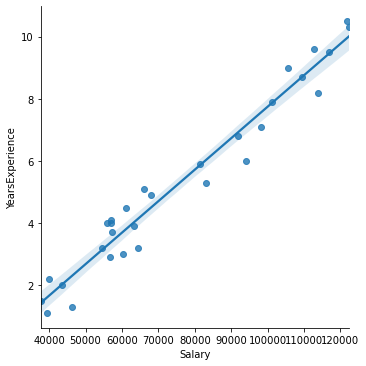

In [8]:
sns.lmplot(x='Salary', y='YearsExperience', data=salary)
plt.show()

#### Normality Test

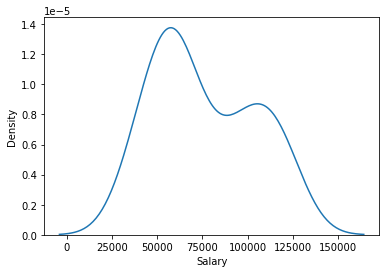

In [10]:
sns.distplot(salary['Salary'], hist=False)
plt.show()

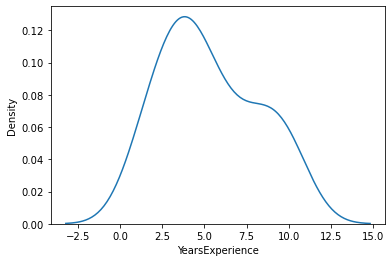

In [11]:
sns.distplot(salary['YearsExperience'], hist=False)
plt.show()

#### Multicollinearity Check - Not Required
#### AutoRegression - YearsExperience is Time based

#### Model Building | Model Training

In [12]:
import statsmodels.formula.api as smf

In [14]:
linear_model = smf.ols(formula='Salary~YearsExperience', data=salary).fit()

In [15]:
linear_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

### Model Testing

#### Manual Calculation

In [16]:
#if x=11 
y = 9449.962321*11+25792.200199
print(y)

129741.78573


In [17]:
#if x=12.5 
y = 9449.962321*12.5+25792.200199
print(y)

143916.72921150003


#### Machine Prediction

In [24]:
new_data=pd.Series([11,12.5])
new_data

0    11.0
1    12.5
dtype: float64

In [25]:
test_data = pd.DataFrame(new_data,columns=['YearsExperience'])
test_data

,YearsExperience
0,11.0
1,12.5


In [26]:
linear_model.predict(test_data)

0    129741.785735
1    143916.729217
dtype: float64

### Model Evaluation

In [27]:
# Finding Rsquared values
linear_model.rsquared , linear_model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [28]:
linear_model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

### Model Deployment

In [29]:
from pickle import dump

In [35]:
dump(linear_model,open('linear_model_salary.pkl','wb'))

In [36]:
from pickle import load

In [37]:
loaded_lin_file = load(open('linear_model_salary.pkl','rb'))

In [38]:
loaded_lin_file.predict(test_data)

0    129741.785735
1    143916.729217
dtype: float64